In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
## Load CSV file to Colab
from google.colab import files
uploaded = files.upload()

Saving iris_csv.csv to iris_csv.csv


In [ ]:
# read Iris file
Iris_df = pd.read_csv('iris_csv.csv')
Iris_df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
Iris_df.shape

(150, 5)

In [ ]:
# data summary
Iris_df.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Highly Balanced Data set


In [ ]:
# Class distribution by flower species

Iris_df.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [ ]:
Iris_df.dtypes

sepallength    float64
sepalwidth     float64
petallength    float64
petalwidth     float64
class           object
dtype: object

All values are float and class is String


Data Visulization


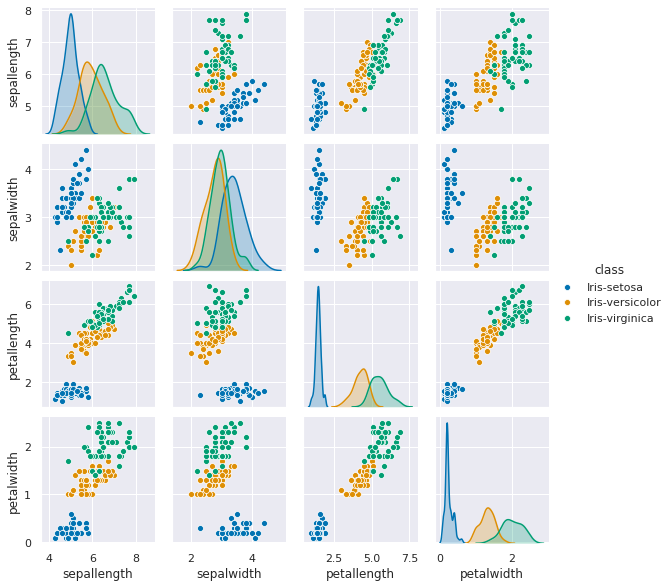

In [ ]:
#Data Visualization
# import the seaborn module
import seaborn as sns
# import the matplotlib module
import matplotlib.pyplot as plt
# set the background colour of the plot to white
sns.set(style="whitegrid", color_codes=True)
# setting the plot size for all plots
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.pairplot(Iris_df, hue="class", height = 2, palette = 'colorblind');

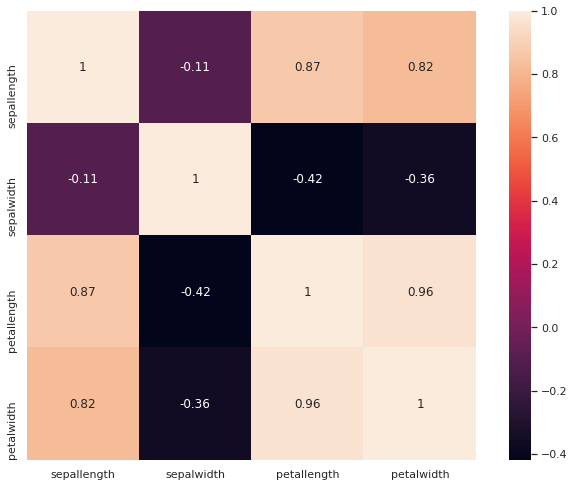

In [ ]:
corrmat = Iris_df.corr()
sns.heatmap(corrmat, annot = True, square = True);

High correlation  between Sepal length and Petal Width.

Petal features also have relatively high correlation with sepal_length, but not with sepal_width


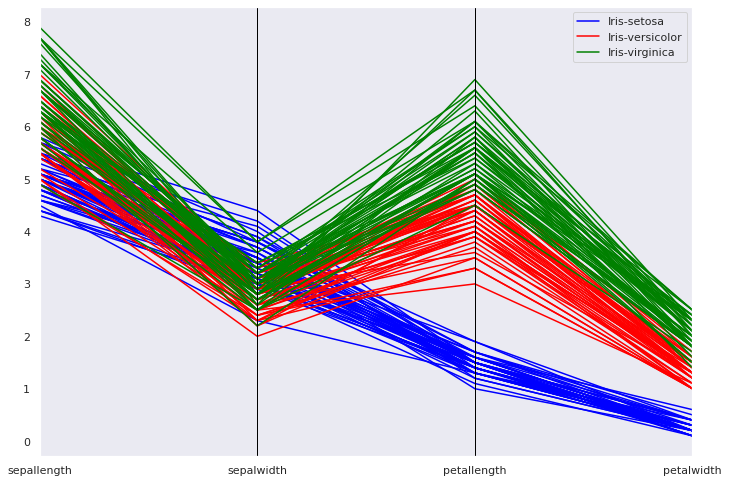

In [ ]:
parallel_coordinates(Iris_df, "class", color = ['blue', 'red', 'green']);

petal measurements can separate species better than the sepal ones.


**Preprocessing Data**

In [ ]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
encoded_value = le.fit_transform(Iris_df['class'])
#print(encoded_value)
Iris_df['class']=encoded_value
Iris_df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Train Test Split**

In [ ]:
y = Iris_df['class']
X = Iris_df.drop(['class'], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(X, y,test_size = 0.20, random_state = 0)

In [ ]:
print("X_train:",X_train.shape)
print("y_train:",y_train.shape)
print("X_test:",X_test.shape)
print("y_test:",y_test.shape)

X_train: (120, 4)
y_train: (120,)
X_test: (30, 4)
y_test: (30,)


As all values are in  Centimeter so did't perform Normalization

**Build Classifiers**

***3) Comapring peformance of all 4 models Logistic Regression, KNN, Naive Bayes, SVM***

As this is highly balanced dataset so we can use Accuracy as evaluation matrix

In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluating each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.933333 (0.062361)
KNN: 0.933333 (0.072648)
NB: 0.950000 (0.055277)
SVM: 0.958333 (0.041667)


Based on mean score of Accuracy, Support Vector Machines would be ideal machine learning algorithm.